<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/agujaDeBuffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Método para el cálculo de π: Aguja de Buffon**

Este método fue ideado por el matemático francés Georges-Louis Leclerc, posteriomente conocido como Conde de Buffon, en el siglo XVIII. El principio básico del experimento es lanzar una aguja sobre una superficie con líneas paralelas y analizar la probabilidad de que la aguja cruce una de las líneas.

Supóngase entonces una superficie plana con líneas paralelas dibujadas a una distancia constante ⅅ entre ellas. Además, supóngase tener una cantidad 𝑛 de agujas de longitud 𝐿, donde 𝐿 ≤ ⅅ.

El experimento consiste en lanzar las agujas sobre la superficie de manera aleatoria y registrar la cantidad de aquellas que crucen una de las líneas.

**Demostración del método**

Designemos a 𝒀 como la distancia entre el punto medio de la aguja y la paralela más próxima, y θ como el ángulo agudo formado entre la aguja, o su prolongación dicha paralela. Estas variables estarán acotadas de la siguiente manera:

0 ≤ 𝘠 ≤ ⅅ/2

0 ≤ θ ≤ π

Todas las posiciones posibles de una aguja se pueden expresar como un rectángulo con los lados de longitud π y ⅅ/2. Asimismo, la condición necesaria para determinar si se produjo la intersección entre la aguja y una línea
paralela es:

𝘠 ≤ 𝐿 sin(θ) / 2

De esta manera, la probabilidad de que una aguja cruce una línea paralela está dada por el cociente:

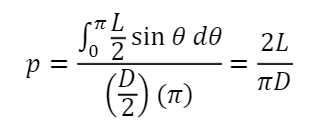

Cono vemos, el numerador se obtiene integrando sobre todas las posibles posiciones y ángulos de la aguja. Por otro lado, la probabilidad experimental de que la aguja cruce una línea paralela es:

𝑝=𝐶/𝑁

Donde 𝐶 es la cantidad de agujas que cruzan una línea paralela y 𝑁 la cantidad total de agujas lanzadas.

Por último, igualamos la probabilidad experimental y teórica para poder estimar el valor de pi:
π ≈ 2𝐿/\𝐶

# **Implementación en Python**

Importación de modulos

In [27]:
import random # Generación de números aleatorios
import math # Para ident. trigonométricas & pi
import time # Para el registro de tiempo
import matplotlib.pyplot as plt # Para la visualización
import numpy as np

Función que posiciona una aguja en una posición aleatoria
y comprueba si corta o no una línea, siguiendo el diagrama A y la ecuación 1

In [2]:
def doesCut(L, D):
    x = D * random.random() # Posición aleatoria entre 0 - D
    theta = math.pi * random.random() / 2 # Ángulo aleatorio entre 0 - pi/2
    y = L * math.cos(theta) # Proyección de la longitud sobre el eje perpendicular
    return y > x # Condición de cruce

Función que aproxima el valor de π de acuerdo a una cantidad dada de agujas y los valores de tamaño de aguja (L) y distancia entre líneas (D)

In [9]:
def estimate_pi(needles, L, D):
    N = 0  # Variable de paro cuando N=needles
    C = 0  # Cantidad de agujas que cruzan una línea
    piValues = []  # Lista para almacenar las estimaciones de pi
    prob = []
    for i in range(needles):
        N += 1
        if doesCut(L, D):
            C += 1 # Aumentar el contador si una aguja cruza
            prob.append(C/(i+1))
        if C > 0:
            piEstimated = 2 * L * N / (D * C) # Estimación de pi con los valores actuales
            piValues.append(piEstimated) # Almacenamiento del nuevo valor
    return piValues, prob


Parámetros del experimento

In [10]:
# Parámetros
agujas = 10000000  # Cantidad de agujas que serán "lanzadas"
L = 0.25  # Longitud de aguja (<=1)
D = 0.75  # Distancia entre líneas horizontales (<=1)

Estimación de π y cálculo de error

In [11]:
# Estimación de pi
[piValues,prob] = estimate_pi(agujas, L, D)
pi = piValues[-1] # Nos quedamos con el último valor de pi estimado
relativeError = abs(pi - math.pi)/math.pi # Cálculo del error relativo

print(f'Valor de pi estimado: {pi}')
print(f'Cantidad de agujas lanzadas: {agujas}')
print(f'Error relativo: {relativeError}')

Valor de pi estimado: 3.1446971051333565
Cantidad de agujas lanzadas: 10000000
Error relativo: 0.000988177617494767


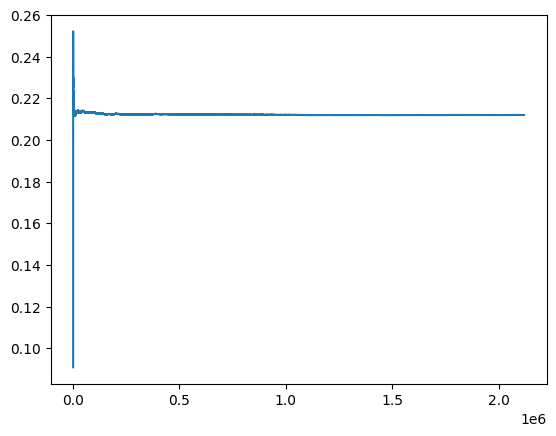

In [13]:
plt.plot(prob)

Visualización de la aproximación

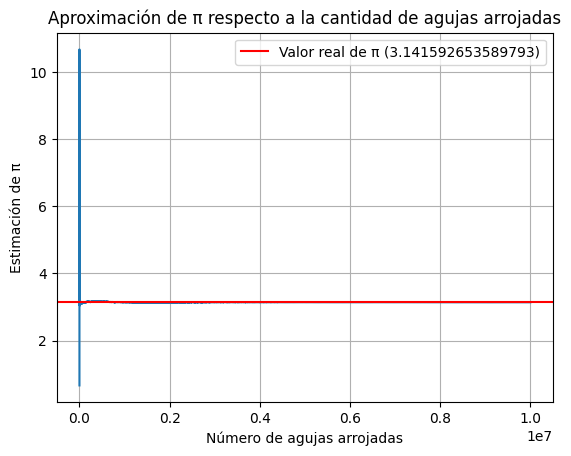

In [ ]:
plt.plot(range(1, len(piValues) + 1), piValues)
plt.axhline(y=math.pi, color='r', linestyle='-', label=f'Valor real de π ({math.pi})')
plt.xlabel('Número de agujas arrojadas')
plt.ylabel('Estimación de π')
plt.title('Aproximación de π respecto a la cantidad de agujas arrojadas')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
agujas = 10000000  # Cantidad de agujas que serán "lanzadas"
L = 0.25  # Longitud de aguja (<=1)
D = 0.75

In [25]:

def modelo(n):
    lista=[]
    L = 0.25  # Longitud de aguja (<=1)
    D = 0.75
    for i in range(n):
        [s,e] = estimate_pi(500,L,D)
        lista.append(np.mean(s))
    return lista

In [29]:
Y = modelo(1000)

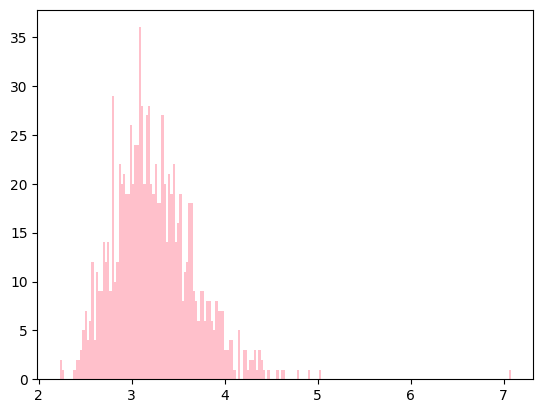

In [30]:
plt.hist(Y,bins = 200, color = "pink")
plt.show()